<a href="https://colab.research.google.com/github/segnig/ml4fraud-ecommerce-banking/blob/task-1/notebooks/fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
FRAUD_FILE_PATH = "/content/drive/MyDrive/10 Academy/Data/Fraud_Data.csv"
IPADDRESS_FILE_PATH = "/content/drive/MyDrive/10 Academy/Data/IpAddress_to_Country.csv"

## **Data Loading**

In [2]:
# Importing Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

fruad_df = pd.read_csv(FRAUD_FILE_PATH)
ipaddress_df = pd.read_csv(IPADDRESS_FILE_PATH)


fruad_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## **Data Profiling**

* **Missing values Data**

In [4]:
fruad_df.isna().sum()

,0
user_id,0
signup_time,0
purchase_time,0
purchase_value,0
device_id,0
source,0
browser,0
sex,0
age,0
ip_address,0


* **Shape of dataset**

In [5]:
print("Shape of Fruad Dataset:", fruad_df.shape)
print("Shape of IpAddress Dataset:", ipaddress_df.shape)

Shape of Fruad Dataset: (151112, 11)
Shape of IpAddress Dataset: (138846, 3)


* **Dataset Meta data**

In [6]:
print("Fruad Dataset Meta Data:")
print(fruad_df.info())

print()
print()

print("IpAddress Dataset Meta Data:")
print(ipaddress_df.info())

Fruad Dataset Meta Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB
None


IpAddress Dataset Meta Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---

* **Number of unique Data per Features**

In [7]:
print("Number of unique values in data per features of fruad dataset")
print(fruad_df.nunique())

print()
print()

print("Number of unique values in data per features of ipaddress dataset")
print(ipaddress_df.nunique())

Number of unique values in data per features of fruad dataset
user_id           151112
signup_time       151112
purchase_time     150679
purchase_value       122
device_id         137956
source                 3
browser                5
sex                    2
age                   58
ip_address        143512
class                  2
dtype: int64


Number of unique values in data per features of ipaddress dataset
lower_bound_ip_address    138846
upper_bound_ip_address    138846
country                      235
dtype: int64


* **Number of users**

In [8]:
print("Number unique Users in the dataset:", fruad_df.user_id.nunique())

Number unique Users in the dataset: 151112


## **Features Type and class**


In [9]:
categorical_columns = fruad_df.select_dtypes(include=['object']).columns
numerical_columns = fruad_df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['signup_time', 'purchase_time', 'device_id', 'source', 'browser',
       'sex'],
      dtype='object')
Numerical Columns: Index(['user_id', 'purchase_value', 'age', 'ip_address', 'class'], dtype='object')


## **EDA**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


low_cardinality_cols = [col for col in fruad_df.columns if fruad_df[col].nunique() < 20]

low_cardinality_cols.remove('class')

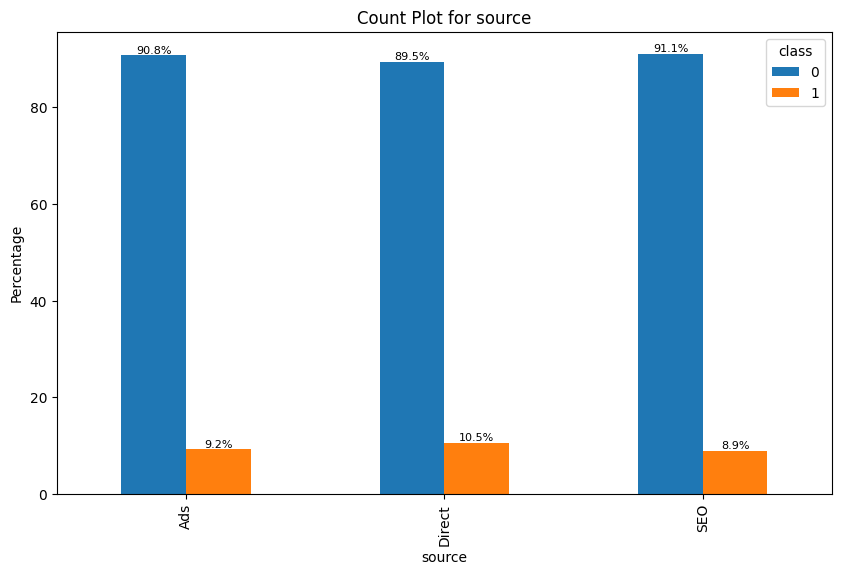

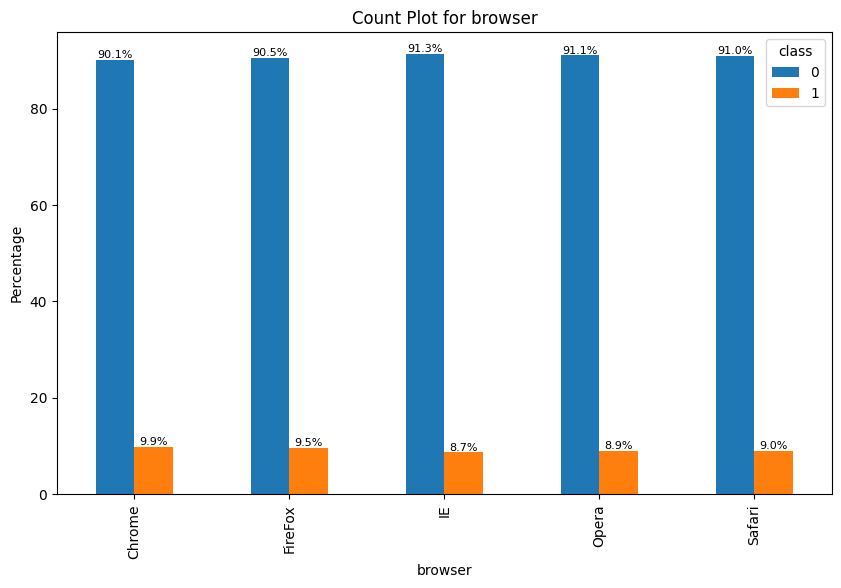

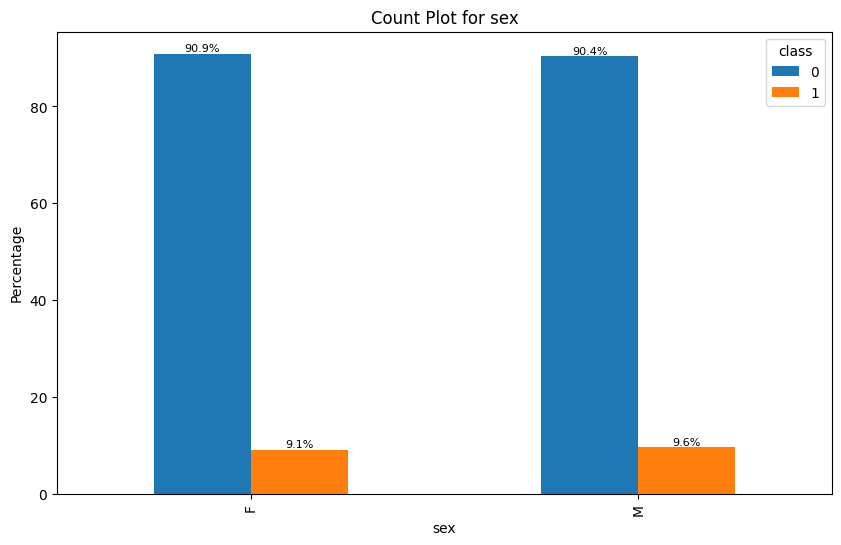

In [11]:
def count_plot_percentage_side_by_side(df, cat, title):
    # Count the occurrences of each combination
    count_data = df.groupby([cat, 'class']).size().unstack(fill_value=0)

    # Calculate percentages
    percentage_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

    # Plot side-by-side bar plot
    ax = percentage_data.plot(kind='bar', figsize=(10, 6))

    plt.title(title)
    plt.ylabel('Percentage')

    # Add percentage labels on each bar
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            if height > 0:
                ax.text(
                    bar.get_x() + bar.get_width() / 2,
                    height,
                    f'{height:.1f}%',
                    ha='center',
                    va='bottom',
                    fontsize=8,
                    color='black'
                )

    plt.legend(title='class')
    plt.show()

for col in low_cardinality_cols:
    count_plot_percentage_side_by_side(fruad_df, col, f"Count Plot for {col}")

## **Distribution numerical features across the target column**

In [12]:
numerical_columns

Index(['user_id', 'purchase_value', 'age', 'ip_address', 'class'], dtype='object')

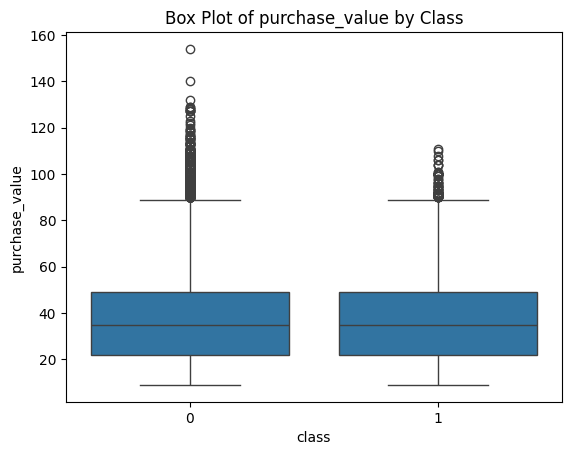

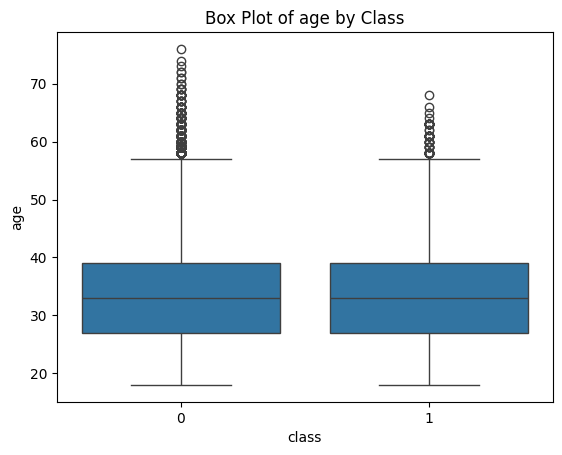

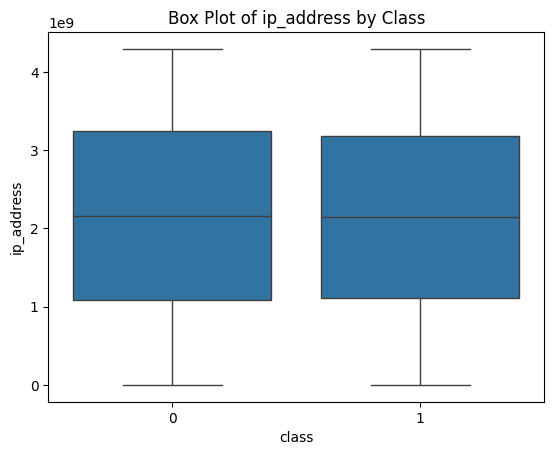

In [13]:
for col in ['purchase_value', 'age', 'ip_address']:
    sns.boxplot(x='class', y=col, data=fruad_df)
    plt.title(f'Box Plot of {col} by Class')
    plt.show()

In [14]:
categorical_columns

Index(['signup_time', 'purchase_time', 'device_id', 'source', 'browser',
       'sex'],
      dtype='object')

In [15]:
fruad_df[categorical_columns].nunique()

,0
signup_time,151112
purchase_time,150679
device_id,137956
source,3
browser,5
sex,2


In [16]:
ipaddress_df.upper_bound_ip_address = ipaddress_df.upper_bound_ip_address.astype(float)
ipaddress_df.lower_bound_ip_address = ipaddress_df.lower_bound_ip_address.astype(float)

In [17]:
# merge Ip to country data with Fruad Dataset
ipaddress_sorted_ipaddress = ipaddress_df.sort_values(by=['lower_bound_ip_address', "upper_bound_ip_address"])
ipaddress_sorted_ipaddress.tail(20)


,lower_bound_ip_address,upper_bound_ip_address,country
138826,3.755990e+09,3.755991e+09,Singapore
138827,3.755991e+09,3.755999e+09,Japan
138828,3.755999e+09,3.757048e+09,India
138829,3.757048e+09,3.757572e+09,China
138830,3.757572e+09,3.757834e+09,China
138831,3.757834e+09,3.757867e+09,Australia
138832,3.757867e+09,3.757900e+09,China
138833,3.757900e+09,3.757965e+09,Korea Republic of
138834,3.757965e+09,3.758031e+09,China
138835,3.758031e+09,3.758064e+09,China


In [18]:
def get_country_from_ip(ip_address, ipaddress_df):
    n = len(ipaddress_df)
    left, right = 0, n - 1

    while left <= right:
        mid = (left + right) // 2
        ip_range = ipaddress_df.iloc[mid]
        lower_bound = ip_range["lower_bound_ip_address"]
        upper_bound = ip_range["upper_bound_ip_address"]
        country = ip_range["country"]

        if lower_bound <= ip_address <= upper_bound:
            return country
        elif ip_address < lower_bound:
            right = mid - 1
        else:
            left = mid + 1

    return "Unknown"

get_country_from_ip(3755990100, ipaddress_sorted_ipaddress)

'Singapore'

## **Map Ip address with their country**

In [19]:
fruad_df['country'] = fruad_df['ip_address'].apply(lambda x: get_country_from_ip(x, ipaddress_sorted_ipaddress))

fruad_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [20]:
fruad_df[fruad_df["country"] == "Unknown"].shape

(21966, 12)

In [21]:
fruad_df[fruad_df["country"] == "Unknown"]["class"].value_counts() / fruad_df[fruad_df["country"] == "Unknown"].shape[0]

,count
class,
0,0.914277
1,0.085723


In [22]:
fruad_df["class"].value_counts() / fruad_df.shape[0]

,count
class,
0,0.906354
1,0.093646


In [23]:
import plotly.express as px

# Step 1: Group by country and class (assuming 'class' indicates fraud type)
country_counts = fruad_df.groupby(['country', 'class']).size().reset_index(name='count')

# Step 2: Plot using choropleth
fig = px.choropleth(country_counts,
                    locations="country",           # Country names
                    locationmode="country names",  # Match using country names
                    color="count",                 # Color by fraud count
                    hover_name="country",          # Country name in hover
                    hover_data={"count": True, "class": True},
                    title="Fraud Count per Country by Class",
                    color_continuous_scale="Reds")  # You can change the color scale

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))

fig.show()


In [24]:
import plotly.express as px

# Step 1: Group by country and class (assuming 'class' indicates fraud type)
country_counts = fruad_df[fruad_df["class"] == 1].groupby(['country', 'class']).size().reset_index(name='count')

# Step 2: Plot using choropleth
fig = px.choropleth(country_counts,
                    locations="country",           # Country names
                    locationmode="country names",  # Match using country names
                    color="count",                 # Color by fraud count
                    hover_name="country",          # Country name in hover
                    hover_data={"count": True, "class": True},
                    title="Fraud Count per Country by Class",
                    color_continuous_scale="Reds")  # You can change the color scale

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))

fig.show()


In [25]:
import plotly.express as px
import pandas as pd

# Step 1: Total transaction counts per country
total_counts = fruad_df.groupby("country").size().reset_index(name="total")

# Step 2: Fraud (class == 1) transaction counts per country
fraud_counts = fruad_df[fruad_df["class"] == 1].groupby("country").size().reset_index(name="fraud")

# Step 3: Merge and calculate percentage
fraud_stats = pd.merge(total_counts, fraud_counts, on="country", how="left")
fraud_stats["fraud"] = fraud_stats["fraud"].fillna(0)  # handle countries with 0 frauds
fraud_stats["fraud_percent"] = (fraud_stats["fraud"] / fraud_stats["total"]) * 100

# Step 4: Plot
fig = px.choropleth(fraud_stats,
                    locations="country",
                    locationmode="country names",
                    color="fraud_percent",
                    hover_name="country",
                    hover_data={"fraud_percent": ':.2f', "fraud": True, "total": True},
                    title="Fraud Percentage per Country",
                    color_continuous_scale="OrRd")

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))

fig.show()


## **purchase_value vs class (target column)**

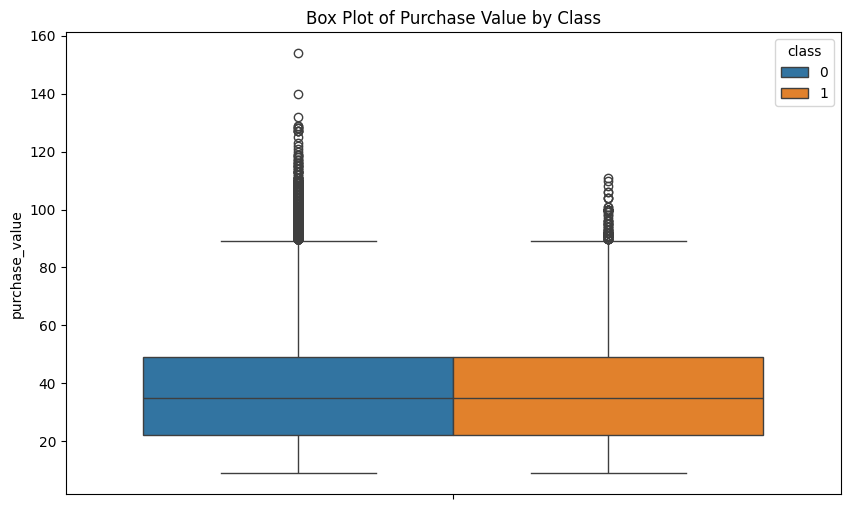

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=fruad_df,
    hue="class",
    y="purchase_value"
)

plt.title("Box Plot of Purchase Value by Class")
plt.show()

## **device_id**

In [47]:
fruad_df["device_id"].nunique(), fruad_df.user_id.nunique()

(137956, 151112)

In [48]:
fruad_df["device_id"].value_counts()

,count
device_id,
NGQCKIADMZORL,20
EQYVNEGOFLAWK,20
ZUSVMDEZRBDTX,20
ITUMJCKWEYNDD,20
CQTUVBYIWWWBC,20
...,...
FCNAWFVSIVERS,1
YJTDUABIOORFL,1
TSECZNFQBXDMY,1


## **Feature Engeering**

In [27]:
# Convert 'purchase_time' to datetime
fruad_df["purchase_time"] = pd.to_datetime(fruad_df["purchase_time"])

# Extract date and time features
fruad_df["purchase_week"] = fruad_df["purchase_time"].dt.isocalendar().week
fruad_df["purchase_month"] = fruad_df["purchase_time"].dt.month
fruad_df["purchase_year"] = fruad_df["purchase_time"].dt.year
fruad_df["purchase_day"] = fruad_df["purchase_time"].dt.day
fruad_df["purchase_hour"] = fruad_df["purchase_time"].dt.hour
fruad_df["purchase_dayofweek"] = fruad_df["purchase_time"].dt.dayofweek

# Add a feature for weekend
fruad_df["is_weekend"] = fruad_df["purchase_dayofweek"].isin([5, 6])

In [28]:
fruad_df.shape

(151112, 19)

In [30]:
fruad_df["signup_time"] = pd.to_datetime(fruad_df["signup_time"])

fruad_df["time_gap_between_purchase_signup"] = fruad_df["purchase_time"] - fruad_df["signup_time"]

fruad_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_week,purchase_month,purchase_year,purchase_day,purchase_hour,purchase_dayofweek,is_weekend,time_gap_between_purchase_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,16,4,2015,18,2,5,True,52 days 03:51:22
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,24,6,2015,8,1,0,False,0 days 04:59:04
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,1,2015,1,18,3,False,0 days 00:00:01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Unknown,19,5,2015,4,13,0,False,5 days 16:41:25
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,37,9,2015,9,18,2,False,50 days 11:31:01


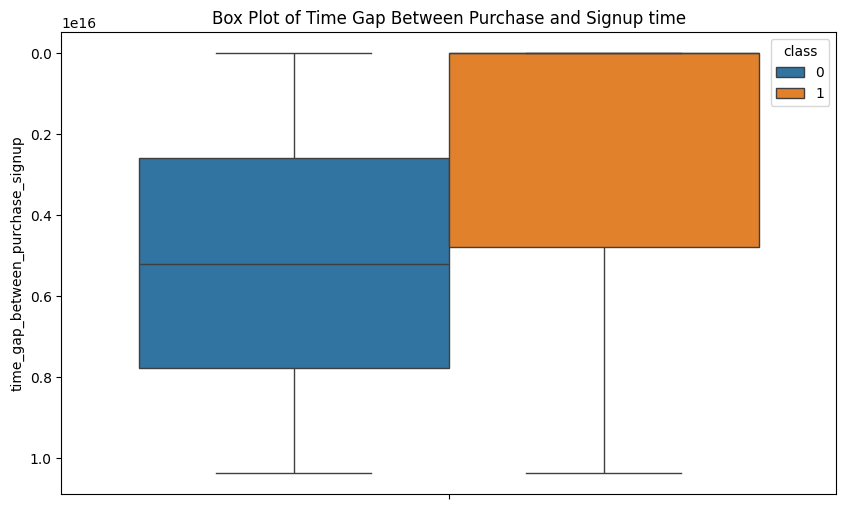

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=fruad_df,
    hue="class",
    y="time_gap_between_purchase_signup"
)

plt.title("Box Plot of Time Gap Between Purchase and Signup time")
plt.show()

In [37]:
fruad_df[fruad_df["class"] == 1].sort_values(by="time_gap_between_purchase_signup").head(20)

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,purchase_week,purchase_month,purchase_year,purchase_day,purchase_hour,purchase_dayofweek,is_weekend,time_gap_between_purchase_signup
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,1,2015,1,18,3,False,0 days 00:00:01
71143,242755,2015-01-01 03:58:57,2015-01-01 03:58:58,16,NLTRLNOXWUCCW,Ads,Safari,M,27,3.988529e+09,1,Unknown,1,1,2015,1,3,3,False,0 days 00:00:01
71134,257908,2015-01-05 19:50:20,2015-01-05 19:50:21,53,TSUHXXJZEDJCJ,SEO,IE,M,45,2.869598e+09,1,China,2,1,2015,5,19,0,False,0 days 00:00:01
71099,266129,2015-01-02 14:04:21,2015-01-02 14:04:22,26,WYVCHOTZJSVOS,Direct,Safari,F,39,1.669659e+09,1,United States,1,1,2015,2,14,4,False,0 days 00:00:01
71066,94837,2015-01-08 09:55:04,2015-01-08 09:55:05,67,EQYVNEGOFLAWK,Ads,IE,M,38,1.797069e+09,1,United States,2,1,2015,8,9,3,False,0 days 00:00:01
130728,141489,2015-01-01 11:17:43,2015-01-01 11:17:44,32,XHUYZYUMVNPXF,Ads,IE,F,45,3.336849e+09,1,United States,1,1,2015,1,11,3,False,0 days 00:00:01
71055,372133,2015-01-07 08:25:06,2015-01-07 08:25:07,37,JJICEXSYQHRHZ,Ads,Opera,M,22,4.292714e+09,1,Unknown,2,1,2015,7,8,2,False,0 days 00:00:01
71054,17602,2015-01-01 02:13:32,2015-01-01 02:13:33,28,UNNWBBNWZYQSF,SEO,Safari,M,22,1.279271e+09,1,Canada,1,1,2015,1,2,3,False,0 days 00:00:01
71049,16069,2015-01-03 15:38:16,2015-01-03 15:38:17,48,JTADJUJEVVGVC,Direct,Chrome,M,37,2.762940e+09,1,United States,1,1,2015,3,15,5,True,0 days 00:00:01
71044,329992,2015-01-11 14:14:35,2015-01-11 14:14:36,50,IMUANOYMWOBNE,SEO,Chrome,M,53,9.557233e+08,1,United States,2,1,2015,11,14,6,True,0 days 00:00:01


/tmp/ipython-input-43-4144601373.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




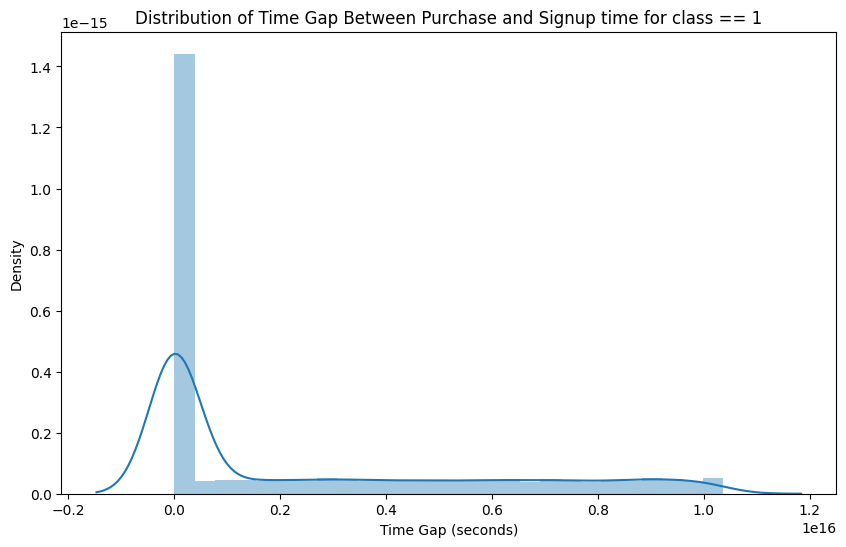

In [43]:
plt.figure(figsize=(10, 6))

sns.distplot(fruad_df[fruad_df["class"] == 1]["time_gap_between_purchase_signup"])

plt.title("Distribution of Time Gap Between Purchase and Signup time for class == 1")
plt.xlabel("Time Gap (seconds)")
plt.ylabel("Density")
plt.show();

/tmp/ipython-input-44-4161194590.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




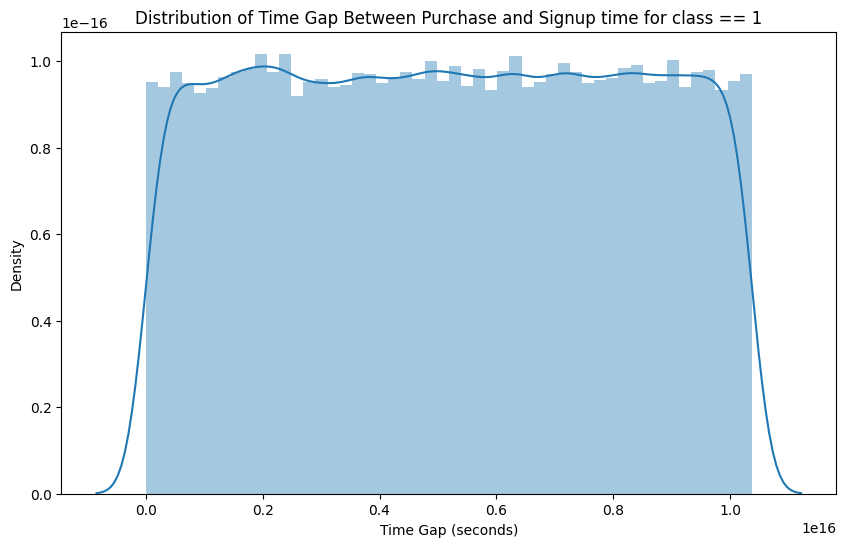

In [44]:
plt.figure(figsize=(10, 6))

sns.distplot(fruad_df[fruad_df["class"] == 0]["time_gap_between_purchase_signup"])

plt.title("Distribution of Time Gap Between Purchase and Signup time for class == 1")
plt.xlabel("Time Gap (seconds)")
plt.ylabel("Density")
plt.show();

In [50]:
fruad_df[categorical_columns].nunique()

,0
signup_time,151112
purchase_time,150679
device_id,137956
source,3
browser,5
sex,2


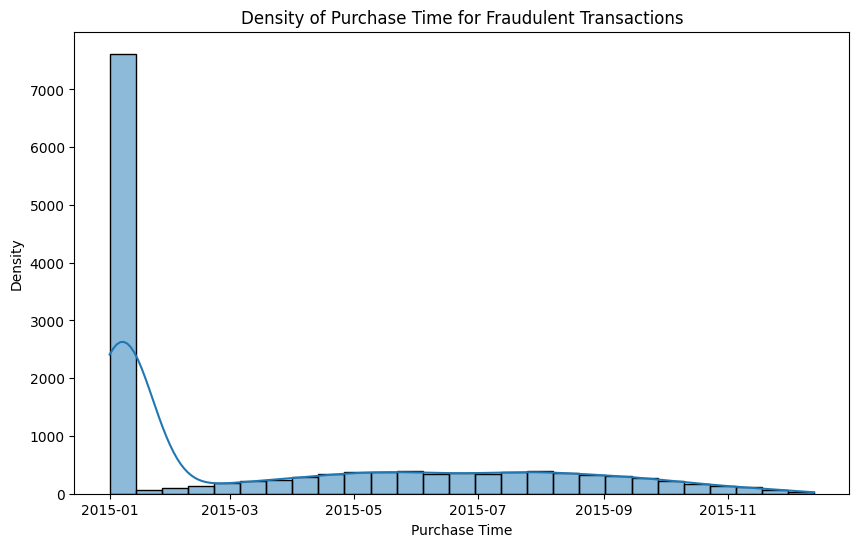

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fruad_df[fruad_df["class"] == 1], x="purchase_time", kde=True)
plt.title("Density of Purchase Time for Fraudulent Transactions")
plt.xlabel("Purchase Time")
plt.ylabel("Density")
plt.show()

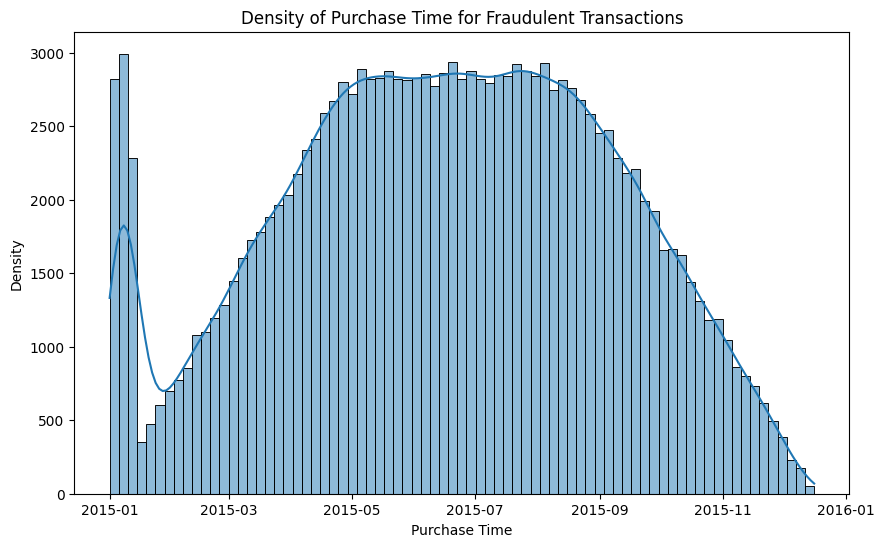

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=fruad_df, x="purchase_time", kde=True)
plt.title("Density of Purchase Time for Fraudulent Transactions")
plt.xlabel("Purchase Time")
plt.ylabel("Density")
plt.show()

In [57]:
low_cardinality_cols = ["source", "sex", "browser"]

fruad_df[low_cardinality_cols]

,source,sex,browser
0,SEO,M,Chrome
1,Ads,F,Chrome
2,SEO,M,Opera
3,SEO,M,Safari
4,Ads,M,Safari
...,...,...,...
151107,SEO,M,Chrome
151108,SEO,M,Safari
151109,SEO,F,IE
151110,SEO,M,Chrome


In [60]:
fruad_df[fruad_df["class"] == 1][["purchase_month", "purchase_week"]].value_counts()

purchase_month  purchase_week
1               2                4404
                1                2460
                3                 779
7               30                222
5               19                220
6               23                215
                26                212
5               20                210
                22                206
8               33                201
5               21                201
7               29                195
8               34                193
4               17                189
7               28                189
4               16                187
6               24                186
8               32                185
                35                173
6               25                171
9               37                169
                38                162
7               31                161
4               15                158
9               36                150
3               13                149
9               39                135
7               27                133
3               11                124
10              41                124
3               12                120
10              42                112
3               10                107
4               18                104
                14                102
5               18                 84
2               8                  82
                9                  77
                7                  74
10              43                 74
                40                 67
                44                 65
11              46                 60
                45                 60
6               27                 58
8               31                 56
2               6                  53
11              47                 52
1               5                  47
9               40                 47
11              48                 35
1               4                  33
3               14                 32
8               36                 25
12              49                 21
                50                 14
3               9                  13
11              44                  7
2               5                   5
11              49                  2
Name: count, dtype: int64

## **Feature  encoding (categorical features)**

In [61]:
# OneHot Encoding
fruad_df = pd.get_dummies(fruad_df, columns=["source", "sex", "browser"])

fruad_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,country,purchase_week,...,source_Ads,source_Direct,source_SEO,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,39,7.327584e+08,0,Japan,16,...,False,False,True,False,True,True,False,False,False,False
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,United States,24,...,True,False,False,True,False,True,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,United States,1,...,False,False,True,False,True,False,False,False,True,False
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,41,3.840542e+09,0,Unknown,19,...,False,False,True,False,True,False,False,False,False,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,45,4.155831e+08,0,United States,37,...,True,False,False,False,True,False,False,False,False,True


In [62]:
fruad_df.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'age', 'ip_address', 'class', 'country', 'purchase_week',
       'purchase_month', 'purchase_year', 'purchase_day', 'purchase_hour',
       'purchase_dayofweek', 'is_weekend', 'time_gap_between_purchase_signup',
       'source_Ads', 'source_Direct', 'source_SEO', 'sex_F', 'sex_M',
       'browser_Chrome', 'browser_FireFox', 'browser_IE', 'browser_Opera',
       'browser_Safari'],
      dtype='object')

In [63]:
categorical_columns = fruad_df.select_dtypes(include=['object']).columns
numerical_columns = fruad_df.select_dtypes(exclude=["object"]).columns

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['device_id', 'country'], dtype='object')
Numerical Columns: Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'age',
       'ip_address', 'class', 'purchase_week', 'purchase_month',
       'purchase_year', 'purchase_day', 'purchase_hour', 'purchase_dayofweek',
       'is_weekend', 'time_gap_between_purchase_signup', 'source_Ads',
       'source_Direct', 'source_SEO', 'sex_F', 'sex_M', 'browser_Chrome',
       'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari'],
      dtype='object')


## Country count less than 100 count

In [75]:
country_counts = fruad_df.country.value_counts()

(country_counts < 100).sum()

np.int64(122)

In [76]:
dropped_columns = ["device_id", "signup_time", "purchase_time", "ip_address"]

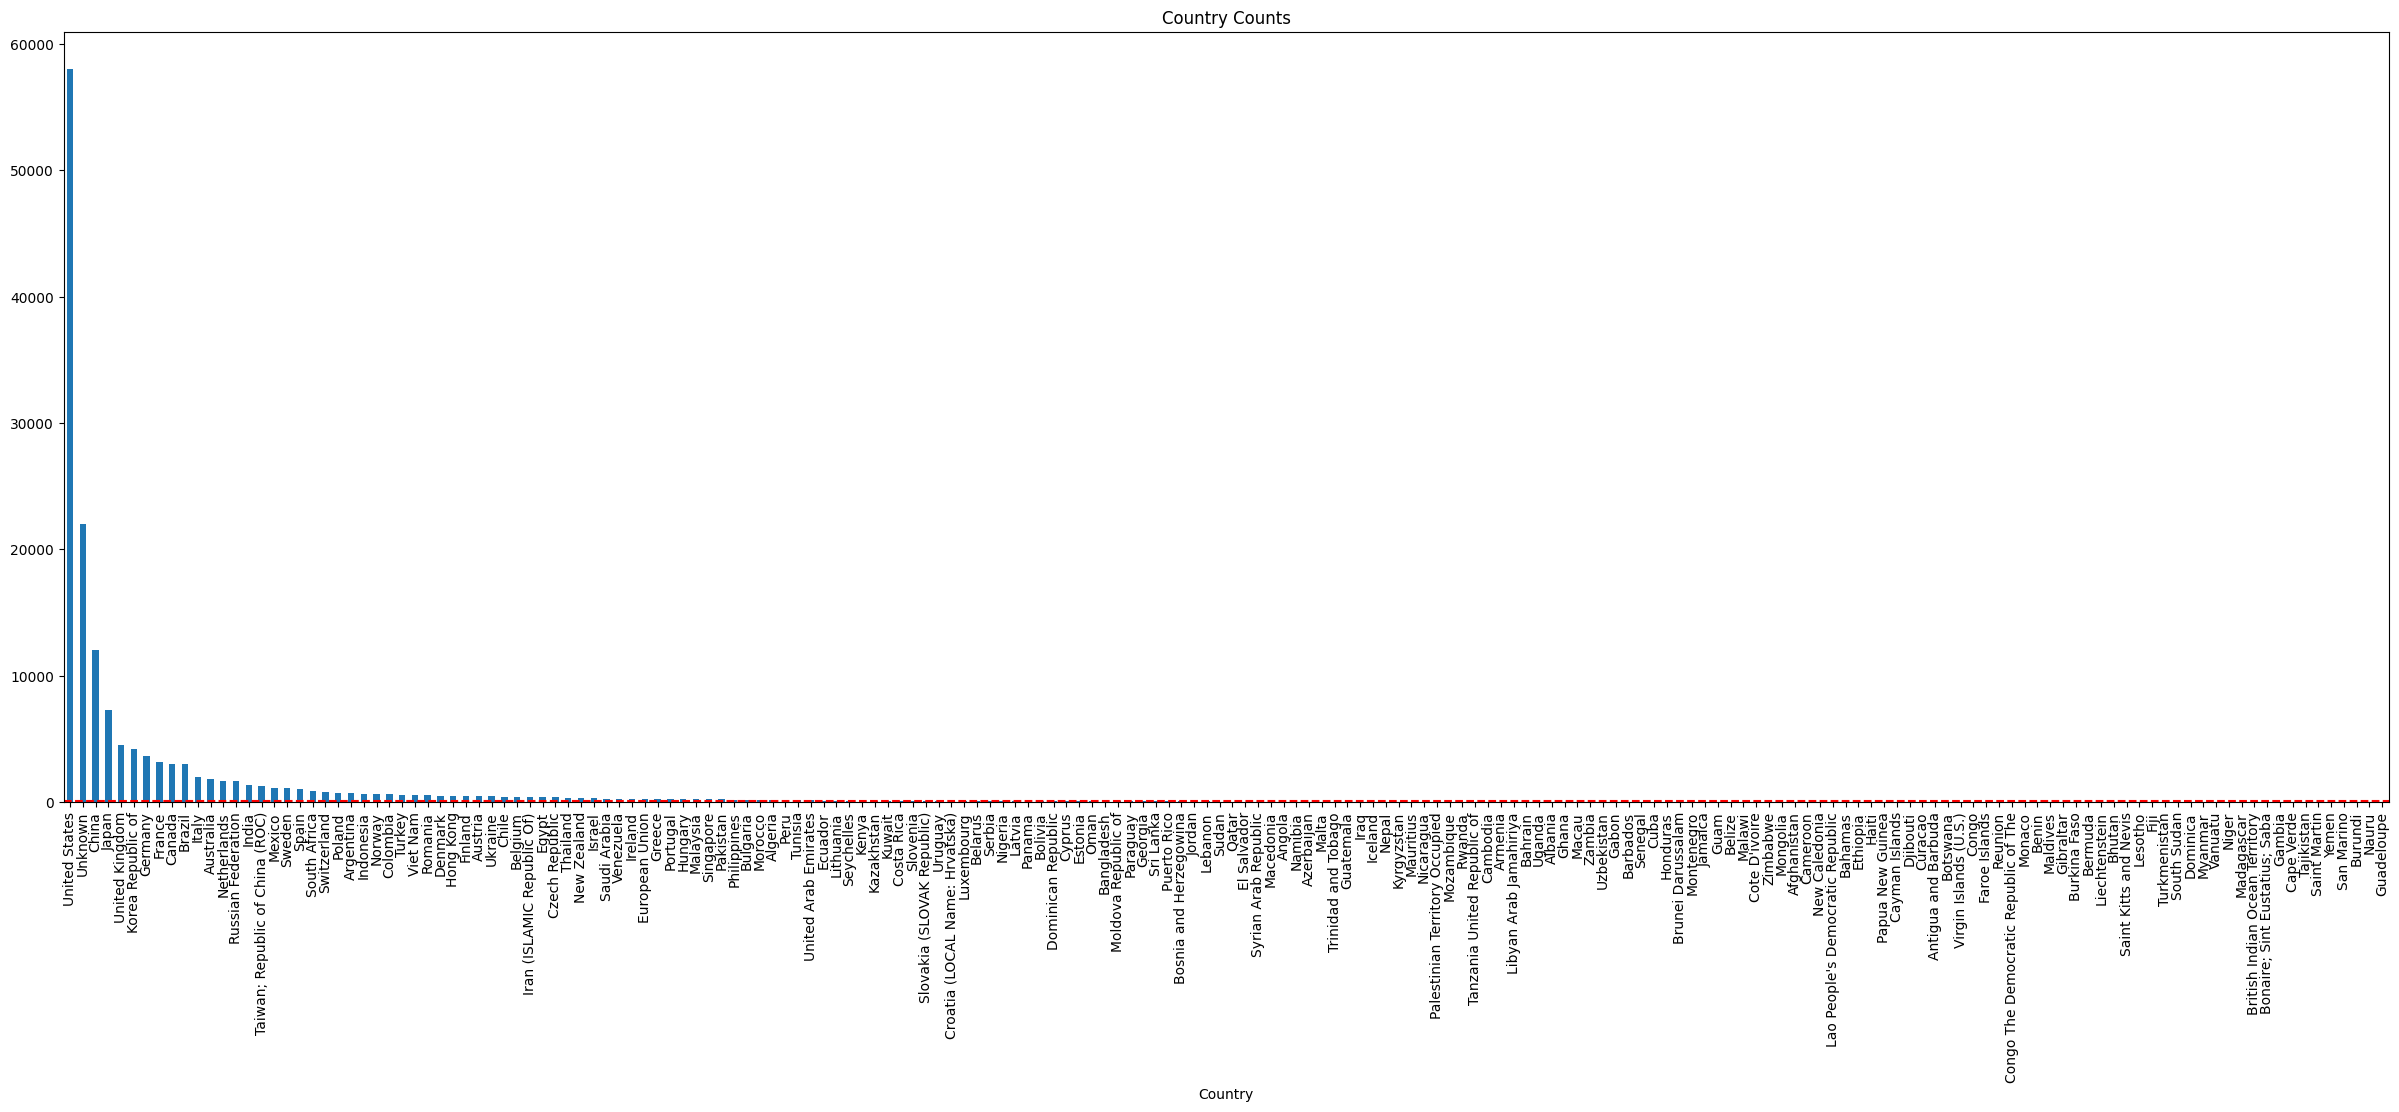

In [82]:
country_counts.plot(kind="bar", figsize=(30, 10))
# plot horizontal line
plt.axhline(y=100, color='r', linestyle='--')
plt.title("Country Counts")
plt.xlabel("Country")
plt.show()

In [83]:
country_to_c = {}

for country, count in country_counts.items():
    if count < 100:
        country_to_c[country] = "other"
    else:
        country_to_c[country] = country

fruad_df["country"] = fruad_df["country"].map(country_to_c)

In [85]:
fruad_df.country.value_counts()

,count
country,
United States,58049
Unknown,21966
China,12038
Japan,7306
United Kingdom,4490
...,...
Algeria,122
Peru,119
Tunisia,118


## **OneHot Encoding Country Feature**

In [86]:
fraud_df_copy = fruad_df.copy()
fruad_df = pd.get_dummies(fruad_df, columns=["country"])

fruad_df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,purchase_week,purchase_month,...,country_Tunisia,country_Turkey,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Unknown,country_Venezuela,country_Viet Nam,country_other
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,39,7.327584e+08,0,16,4,...,False,False,False,False,False,False,False,False,False,False
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,24,6,...,False,False,False,False,False,True,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,1,1,...,False,False,False,False,False,True,False,False,False,False
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,41,3.840542e+09,0,19,5,...,False,False,False,False,False,False,True,False,False,False
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,45,4.155831e+08,0,37,9,...,False,False,False,False,False,True,False,False,False,False


In [88]:
# label encoding for country
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
fraud_df_copy["country"] = label_encoder.fit_transform(fraud_df_copy["country"])

fraud_df_copy.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,country,purchase_week,...,source_Ads,source_Direct,source_SEO,sex_F,sex_M,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,39,7.327584e+08,0,28,16,...,False,False,True,False,True,True,False,False,False,False
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,56,24,...,True,False,False,True,False,True,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,56,1,...,False,False,True,False,True,False,False,False,True,False
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,41,3.840542e+09,0,57,19,...,False,False,True,False,True,False,False,False,False,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,45,4.155831e+08,0,56,37,...,True,False,False,False,True,False,False,False,False,True


## **Drop High cardinality features**

In [89]:
fraud_df_copy.drop(columns=dropped_columns, inplace=True)
fruad_df.drop(columns=dropped_columns, inplace=True)

## **Save Cleaned Dataset**

In [93]:
fruad_df.to_csv("/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/Fraud_Data_onehot_encoded.csv", index=False)
fraud_df_copy.to_csv("/content/drive/MyDrive/10 Academy/Cleaned_Data_w8&9/Fraud_Data_label_encoded.csv", index=False)